# <b>Extreme Data Challenge</b>

##  Today's Mission
- Your objective is to devise the best possible model to predict successful/default loans using Lending Club loan data.

- Class into divided into 4 groups. Groups were decided by an extremely high tech clustering algorithm.

        Team Seaborn: Zahra, Jeremy, Sierra, Aseem
        Team Pandas: Alvin, Kalyn, TJ, Julia
        Team Numpy: Armando, Erik, Joyce, Cherry
        Team Sklearn: Jamie, Monica, Patrick, Yudi, Lucas

- The training data is 100000 loans labeled either as 1 (successful) or 0 (default). Comes with 33 categorical and numerical features. The testing data is 50000 loans.

- A data dictionary file is included as well. It is a table explaining each what each feature means.

- Groups will judged on how much money their model makes. You will use your model on the testing dataset by making predictions on it and testing them. Assume that each loan is 1000 dollars and the interest rate is 10 percent. That means for every loan you issue that is successfully repaid, you will earn 100 dollars and for every loan you issue that defaults, you will lose 1000 dollars.
    
        Profit = 100*(Number of True Positives) - 1000*(Number of False Positives) 
        
- Mario, Zack, and George will be on be hand for guidance. However we want you to primarily use your teammates for help. 

- Use all the tools at your disposal, try all the models we've learned in class. Refer to past class notebooks for help. Be sure to use modeling evaluating techniques such as ROC curves, confusion matrix, recall/precision, etc.

- To optimize model, find the right combination of features and the right model with the right parameters. Get creative!

- Remember to use your time wisely, it will go by fast. Communicate amongst yourselves often.
   

### Online resources on Lending Club loan data
Kaggle Page: https://www.kaggle.com/wendykan/lending-club-loan-data. Make sure to check out the kernels section.

Y Hat tutorial (It's in R, but its still useful): http://blog.yhat.com/posts/machine-learning-for-predicting-bad-loans.html

Blog tutorial on the data from Kevin Davenport: http://kldavenport.com/lending-club-data-analysis-revisted-with-python/


### Class Time
No class breaks. But individual breaks are allowed of course.

- 6:30 - 7:10
    - Feature engineering/selection: make dummy variables, dropping features, log transformation, scaling, and other methods of transforming data. 
    - Exploratory data analysis aka get to know your features time.
    
    
- 7:10 - 8:50
    - Modeling time!!
    
    
- 8:50 - 9:25
    - Model testing.
    
    
- 9:25 - 9:30
    - Exit tickets

In [69]:
#Imports and set pandas options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
pd.set_option("max.columns", 100)
pd.set_option("max.colwidth", 100)

In [70]:
# Load in training data.
# Loan_status column is the target variable. Remember to drop it from df.
df = pd.read_csv("loan_training_data.csv").sample(frac=.25, random_state =1234)
df.reset_index(drop=True,inplace=True)

In [71]:
#Load in data dictionary
# Loan S
data_dict = pd.read_csv("the_data_dictionary.csv")
data_dict

,dtypes,name,description
0,float64,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit ..."
1,object,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,float64,installment,The monthly payment owed by the borrower if the loan originates.
3,object,grade,LC assigned loan grade
4,object,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one yea...
5,object,home_ownership,The home ownership status provided by the borrower during registration or obtained from the cred...
6,float64,annual_inc,The self-reported annual income provided by the borrower during registration.
7,object,verification_status,"Indicates if income was verified by LC, not verified, or if the income source was verified"
8,object,loan_status,Current status of the loan
9,object,purpose,A category provided by the borrower for the loan request.


In [72]:
df.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,revol_bal,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,bc_util,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average
0,23800.0,60 months,539.70,B,10+ years,MORTGAGE,54000.0,Verified,1,home_improvement,1.71,0.0,2.0,1575.0,9.0,0.0,62345.0,20000.0,31173.0,7.9,1.0,0.0,1.0,1.0,1.0,6.0,1.0,0.0,0.0,1575.0,20000.0,0.0,807.0
1,5000.0,36 months,171.11,B,1 year,RENT,127500.0,Not Verified,0,debt_consolidation,11.18,1.0,8.0,8054.0,22.0,171.0,85771.0,9200.0,10721.0,93.2,0.0,0.0,3.0,5.0,3.0,5.0,5.0,0.0,1.0,85771.0,3000.0,83606.0,672.0
2,5000.0,60 months,119.22,C,5 years,RENT,40000.0,Verified,1,credit_card,2.25,0.0,2.0,3787.0,5.0,0.0,3787.0,9300.0,1894.0,40.7,0.0,0.0,1.0,1.0,2.0,4.0,1.0,0.0,0.0,3787.0,9300.0,0.0,722.0
3,14975.0,60 months,422.07,F,8 years,MORTGAGE,50000.0,Source Verified,1,debt_consolidation,18.48,0.0,8.0,5723.0,15.0,0.0,31813.0,19100.0,3977.0,96.5,1.0,0.0,2.0,5.0,2.0,3.0,5.0,0.0,3.0,31813.0,5000.0,27122.0,672.0
4,7500.0,36 months,279.50,E,7 years,RENT,32000.0,Verified,1,debt_consolidation,19.24,0.0,14.0,609.0,29.0,0.0,9826.0,16200.0,702.0,6.1,1.0,1.0,2.0,6.0,2.0,9.0,6.0,0.0,6.0,9826.0,3400.0,11551.0,682.0


### Ready, Set, Go!!

In [73]:
df.corr()

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,open_acc,revol_bal,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,bc_util,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average
loan_amnt,1.000000,0.957115,0.312734,-0.057066,0.020891,0.008641,0.192127,0.267774,0.220781,-0.032000,0.325433,0.160436,0.246200,0.044315,0.236695,-0.039693,0.178866,0.138820,0.198977,0.186082,0.142139,-0.015863,-0.011930,0.271659,0.392631,0.191792,0.126742
installment,0.957115,1.000000,0.311053,-0.030272,0.017123,0.021415,0.182067,0.263270,0.200312,-0.030920,0.293336,0.151542,0.216495,0.072334,0.205809,-0.034290,0.188093,0.152910,0.196502,0.181249,0.156175,-0.007960,0.002310,0.259951,0.362376,0.177046,0.077219
annual_inc,0.312734,0.311053,1.000000,0.041057,-0.173169,0.058104,0.134354,0.250916,0.178800,-0.003393,0.384720,0.190998,0.308352,-0.014071,0.220706,0.024960,0.075227,0.050913,0.095396,0.111505,0.051616,0.018421,0.051650,0.307634,0.246715,0.245664,0.097113
loan_status,-0.057066,-0.030272,0.041057,1.000000,-0.116626,-0.016071,-0.036708,0.015126,0.009092,0.006214,0.060989,0.024112,0.072511,-0.074687,0.064696,-0.007588,-0.042001,-0.077808,-0.009920,0.013857,-0.077578,-0.004943,-0.082789,0.008809,0.066983,0.008456,0.118798
dti,0.020891,0.017123,-0.173169,-0.116626,1.000000,-0.022844,0.291615,0.097465,0.222445,-0.026389,-0.021687,0.027526,-0.133284,0.176791,-0.068695,-0.063300,0.156936,0.244320,0.096861,0.068400,0.246543,-0.032796,0.112237,0.273255,0.036405,0.333932,-0.068885
delinq_2yrs,0.008641,0.021415,0.058104,-0.016071,-0.022844,1.000000,0.048361,-0.029608,0.121625,-0.003654,0.070538,-0.021877,0.061986,-0.017979,0.098356,0.204623,-0.058924,-0.024860,-0.039606,0.039176,-0.025732,0.640819,-0.028692,0.024534,-0.070038,0.062780,-0.163219
open_acc,0.192127,0.182067,0.134354,-0.036708,0.291615,0.048361,1.000000,0.157063,0.663704,0.002592,0.225089,0.147660,-0.100006,-0.094380,0.095334,0.009700,0.506123,0.638446,0.582277,0.451093,0.641058,-0.006277,0.328862,0.369349,0.310988,0.367346,0.026126
revol_bal,0.267774,0.263270,0.250916,0.015126,0.097465,-0.029608,0.157063,1.000000,0.137648,-0.022976,0.416535,0.843697,0.307537,0.093158,0.157189,-0.069337,0.192433,0.193013,0.174006,0.141416,0.196663,-0.027332,-0.022442,0.607768,0.403926,0.062809,0.061644
total_acc,0.220781,0.200312,0.178800,0.009092,0.222445,0.121625,0.663704,0.137648,1.000000,0.041254,0.311195,0.119902,0.089420,-0.081696,0.393782,0.153257,0.239064,0.336588,0.337904,0.633657,0.337278,0.064371,0.314765,0.391318,0.252515,0.413047,0.033149
tot_coll_amt,-0.032000,-0.030920,-0.003393,0.006214,-0.026389,-0.003654,0.002592,-0.022976,0.041254,1.000000,0.005284,-0.012590,0.008820,-0.039262,0.032633,0.203647,-0.027031,-0.008985,-0.019844,0.031245,-0.008799,0.000631,0.018791,-0.020717,-0.045277,-0.011647,-0.077865


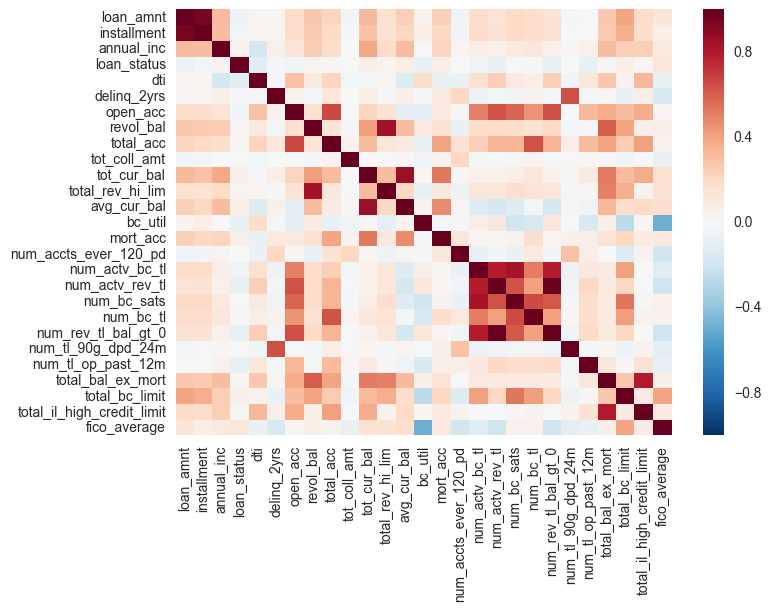

In [7]:
sb.heatmap(df.corr())

In [8]:
df.describe()

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,open_acc,revol_bal,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,bc_util,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average
count,25000.000000,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04,25000.000000,25000.000000,2.500000e+04,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.000000
mean,14237.816000,441.858528,7.359464e+04,0.807640,17.317498,0.297360,11.346520,1.606135e+04,25.569360,149.867480,1.367620e+05,3.010007e+04,13495.219400,64.856628,1.832920,0.411000,3.674840,5.648520,4.65440,8.920080,5.635160,0.080160,1.953080,4.510247e+04,19744.629280,36498.217560,696.017020
std,8105.818951,244.975400,6.721008e+04,0.394162,7.790381,0.808259,4.897849,2.606073e+04,11.620408,1352.747492,1.546192e+05,6.996720e+04,16105.501526,26.394315,2.196925,1.116839,2.045815,2.958508,2.56765,4.911922,2.947989,0.441613,1.582106,4.591183e+04,19164.351447,38811.433205,29.555434
min,1000.000000,28.820000,8.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000e+00,2.000000,0.000000,0.000000e+00,2.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,662.000000
25%,8000.000000,265.680000,4.500000e+04,1.000000,11.407500,0.000000,8.000000,6.489750e+03,17.000000,0.000000,2.740050e+04,1.330000e+04,2936.750000,46.300000,0.000000,0.000000,2.000000,4.000000,3.00000,5.000000,4.000000,0.000000,1.000000,1.932400e+04,7200.000000,11470.500000,672.000000
50%,12000.000000,388.100000,6.300000e+04,1.000000,16.940000,0.000000,11.000000,1.160100e+04,24.000000,0.000000,7.696300e+04,2.220000e+04,7278.000000,69.400000,1.000000,0.000000,3.000000,5.000000,4.00000,8.000000,5.000000,0.000000,2.000000,3.397250e+04,13800.000000,27209.000000,687.000000
75%,19975.000000,576.290000,8.900000e+04,1.000000,23.020000,0.000000,14.000000,1.981550e+04,32.000000,0.000000,2.065422e+05,3.692275e+04,18987.750000,87.500000,3.000000,0.000000,5.000000,7.000000,6.00000,11.000000,7.000000,0.000000,3.000000,5.662150e+04,25500.000000,49608.500000,712.000000
max,35000.000000,1408.130000,7.500000e+06,1.000000,39.960000,19.000000,49.000000,2.568995e+06,102.000000,56234.000000,3.881449e+06,9.999999e+06,298573.000000,132.500000,25.000000,33.000000,19.000000,30.000000,27.00000,42.000000,30.000000,18.000000,19.000000,2.644442e+06,296700.000000,663038.000000,847.500000


In [74]:
X_all = df.drop('loan_status', 1)
y_all = df['loan_status']

In [75]:
X_all.groupby(['emp_length'])['emp_length'].count()

emp_length
1 year       1570
10+ years    8144
2 years      2227
3 years      1921
4 years      1369
5 years      1643
6 years      1447
7 years      1427
8 years      1232
9 years       960
< 1 year     1909
n/a          1151
Name: emp_length, dtype: int64

In [76]:
# X_all['emp_length'] = X_all.replace['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
X_all['emp_length'] = X_all['emp_length'].replace('1 year',1.0).replace('10+ years',10.0).replace('2 years',2.0).replace('3 years',3.0).replace('4 years',4.0).replace('5 years',5.0).replace('6 years',6.0).replace('7 years',7.0).replace('8 years',8.0).replace('9 years',9.0).replace('< 1 year',0.5).replace('n/a',6.12)

In [77]:
X_all['grade'] = X_all['grade'].replace('A',1).replace('B',2).replace('C',3).replace('D',4).replace('E',5).replace('F',6).replace('G',7)

In [78]:
X_all.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,open_acc,revol_bal,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,bc_util,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average
0,23800.0,60 months,539.70,2,10.0,MORTGAGE,54000.0,Verified,home_improvement,1.71,0.0,2.0,1575.0,9.0,0.0,62345.0,20000.0,31173.0,7.9,1.0,0.0,1.0,1.0,1.0,6.0,1.0,0.0,0.0,1575.0,20000.0,0.0,807.0
1,5000.0,36 months,171.11,2,1.0,RENT,127500.0,Not Verified,debt_consolidation,11.18,1.0,8.0,8054.0,22.0,171.0,85771.0,9200.0,10721.0,93.2,0.0,0.0,3.0,5.0,3.0,5.0,5.0,0.0,1.0,85771.0,3000.0,83606.0,672.0
2,5000.0,60 months,119.22,3,5.0,RENT,40000.0,Verified,credit_card,2.25,0.0,2.0,3787.0,5.0,0.0,3787.0,9300.0,1894.0,40.7,0.0,0.0,1.0,1.0,2.0,4.0,1.0,0.0,0.0,3787.0,9300.0,0.0,722.0
3,14975.0,60 months,422.07,6,8.0,MORTGAGE,50000.0,Source Verified,debt_consolidation,18.48,0.0,8.0,5723.0,15.0,0.0,31813.0,19100.0,3977.0,96.5,1.0,0.0,2.0,5.0,2.0,3.0,5.0,0.0,3.0,31813.0,5000.0,27122.0,672.0
4,7500.0,36 months,279.50,5,7.0,RENT,32000.0,Verified,debt_consolidation,19.24,0.0,14.0,609.0,29.0,0.0,9826.0,16200.0,702.0,6.1,1.0,1.0,2.0,6.0,2.0,9.0,6.0,0.0,6.0,9826.0,3400.0,11551.0,682.0


In [79]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)
    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))



Processed feature columns (51 total features):
['loan_amnt', 'term_ 36 months', 'term_ 60 months', 'installment', 'grade', 'emp_length', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'annual_inc', 'verification_status_Not Verified', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'dti', 'delinq_2yrs', 'open_acc', 'revol_bal', 'total_acc', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'avg_cur_bal', 'bc_util', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_rev_tl_bal_gt_0', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'total_bal_ex_mort', 'total_bc_

In [80]:
X_all

,loan_amnt,term_ 36 months,term_ 60 months,installment,grade,emp_length,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,annual_inc,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,dti,delinq_2yrs,open_acc,revol_bal,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,bc_util,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average
0,23800.0,0.0,1.0,539.70,2,10.00,1.0,0.0,0.0,0.0,0.0,54000.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.71,0.0,2.0,1575.0,9.0,0.0,62345.0,20000.0,31173.0,7.9,1.0,0.0,1.0,1.0,1.0,6.0,1.0,0.0,0.0,1575.0,20000.0,0.0,807.0
1,5000.0,1.0,0.0,171.11,2,1.00,0.0,0.0,0.0,0.0,1.0,127500.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.18,1.0,8.0,8054.0,22.0,171.0,85771.0,9200.0,10721.0,93.2,0.0,0.0,3.0,5.0,3.0,5.0,5.0,0.0,1.0,85771.0,3000.0,83606.0,672.0
2,5000.0,0.0,1.0,119.22,3,5.00,0.0,0.0,0.0,0.0,1.0,40000.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.25,0.0,2.0,3787.0,5.0,0.0,3787.0,9300.0,1894.0,40.7,0.0,0.0,1.0,1.0,2.0,4.0,1.0,0.0,0.0,3787.0,9300.0,0.0,722.0
3,14975.0,0.0,1.0,422.07,6,8.00,1.0,0.0,0.0,0.0,0.0,50000.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.48,0.0,8.0,5723.0,15.0,0.0,31813.0,19100.0,3977.0,96.5,1.0,0.0,2.0,5.0,2.0,3.0,5.0,0.0,3.0,31813.0,5000.0,27122.0,672.0
4,7500.0,1.0,0.0,279.50,5,7.00,0.0,0.0,0.0,0.0,1.0,32000.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.24,0.0,14.0,609.0,29.0,0.0,9826.0,16200.0,702.0,6.1,1.0,1.0,2.0,6.0,2.0,9.0,6.0,0.0,6.0,9826.0,3400.0,11551.0,682.0
5,12000.0,1.0,0.0,399.26,2,5.00,0.0,0.0,0.0,0.0,1.0,65400.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.94,0.0,16.0,19422.0,17.0,0.0,34037.0,23300.0,2127.0,87.1,0.0,0.0,5.0,5.0,6.0,6.0,5.0,0.0,0.0,34037.0,22300.0,35792.0,702.0
6,16800.0,1.0,0.0,555.36,2,1.00,0.0,0.0,0.0,1.0,0.0,54000.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.97,0.0,6.0,13114.0,16.0,0.0,136704.0,17000.0,22784.0,78.9,1.0,0.0,2.0,4.0,2.0,4.0,4.0,0.0,2.0,16404.0,8000.0,5836.0,687.0
7,15000.0,1.0,0.0,495.86,2,8.00,1.0,0.0,0.0,0.0,0.0,55000.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.80,0.0,13.0,13328.0,21.0,0.0,166653.0,36100.0,12819.0,49.9,1.0,0.0,3.0,6.0,3.0,4.0,6.0,0.0,2.0,67199.0,12700.0,62457.0,717.0
8,14000.0,0.0,1.0,337.56,3,5.00,1.0,0.0,0.0,0.0,0.0,68000.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.14,0.0,14.0,12690.0,16.0,0.0,187255.0,30200.0,13375.0,59.6,2.0,0.0,5.0,8.0,6.0,6.0,8.0,0.0,3.0,20698.0,17100.0,19530.0,712.0
9,7900.0,1.0,0.0,267.52,3,6.12,0.0,0.0,0.0,0.0,1.0,52673.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.38,0.0,8.0,5193.0,21.0,389.0,13250.0,11500.0,1656.0,49.4,0.0,0.0,4.0,7.0,4.0,4.0,7.0,0.0,2.0,13250.0,9000.0,14547.0,672.0


In [81]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, random_state=1)

In [82]:
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(18750, 51) (18750,)
(6250, 51) (6250,)


In [83]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_all)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [19]:
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)
k_range = range(2, 100)

NameError: name 'X_scaled' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_all, y_all)

In [ ]:
from sklearn.svm import SVC()
clf_C = SVC()

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
#Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingClassifier

# Create the parameters list you wish to tune
parameters = [{'max_depth':[2,3,4]},{'n_estimators':[20,50,75,100,150]},{'learning_rate':[.02,.03,.05,.1,.15]}]
# learning rate denotes the iterative contribution of each new step
# max depth is depth of decision tree we are including
# max features is number of nodes
# some other shit
# n estimators is number of 'boosting stages' to perform-- i.e. number of simple models you are testing

# Initialize the classifier
clf = GradientBoostingClassifier(random_state=1)

# Make an f1 scoring function using 'make_scorer' 
# f1_scorer = make_scorer(f1_score, pos_label=1)

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring='roc_auc',cv=5)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

In [85]:
clf

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)

In [132]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

IndexError: too many indices for array

In [93]:

from sklearn.metrics import confusion_matrix
#Profit calculator
def profit_calculator(y_true, y_preds):
    cm = confusion_matrix(y_true, y_preds)
    tp = cm[1,1]
    fp = cm[0,1]
    return 100*tp - 1000*fp

In [140]:

print profit_calculator(y_test, y_pred)
print y_pred.shape
print y_test.shape

36900
(6250,)
(6250,)


In [138]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred = clf.predict_proba(X_test)[:,1]
fpr, tpr, thres = roc_curve(y_test, y_pred)
roc_auc_score(y_test, y_pred)

0.70547515198186306

In [139]:
y_pred[y_pred>0.9] = 1.
y_pred[y_pred<=0.9] = 0.

In [134]:
thres[175]

0.90028318811218189

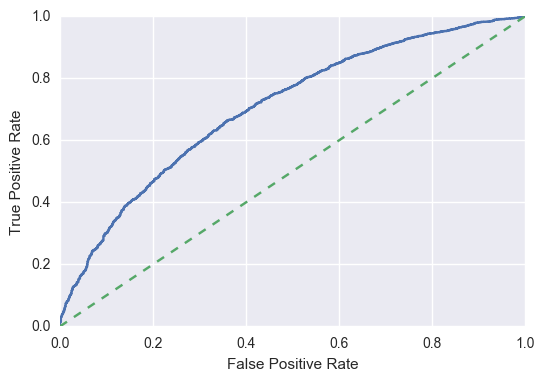

In [97]:

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [93]:
from sklearn.svm import SVC
clf_SVC = SVC()

In [98]:
clf_SVC.fit(X_train,y_train)
y_pred_SVC = clf_SVC.predict(X_test)

KeyboardInterrupt: 

In [103]:
y_pred_SVC

array([1, 1, 1, ..., 1, 1, 1])

In [97]:
print profit_calculator(y_test, y_pred_SVC)

-660900


In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df_n = StandardScaler().fit_transform(X_all)
hep_pca = PCA()
hep_pca.fit(df_n)
stats_pcs = hep_pca.transform(df_n)
X_all = pd.DataFrame(stats_pcs, columns=['PC'+str(i) for i in range(1,52)])

ValueError: Shape of passed values is (62, 25000), indices imply (51, 25000)

In [100]:
dft = pd.read_csv("loan_testing_data.csv").sample(frac=.2, random_state=1234)
dft.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,revol_bal,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,bc_util,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average
20308,11000.0,36 months,365.31,B,10+ years,RENT,100000.0,Not Verified,0,other,17.56,0.0,11.0,8870.0,18.0,0.0,58579.0,20300.0,5325.0,87.0,0.0,0.0,3.0,7.0,3.0,4.0,7.0,0.0,2.0,58579.0,3500.0,56677.0,687.0
37706,18000.0,60 months,498.68,E,7 years,RENT,57600.0,Verified,0,debt_consolidation,38.06,0.0,15.0,12827.0,36.0,0.0,71366.0,25000.0,4758.0,44.8,0.0,1.0,1.0,4.0,2.0,3.0,4.0,0.0,6.0,71366.0,2100.0,81396.0,682.0
6041,28000.0,36 months,876.13,A,10+ years,MORTGAGE,220000.0,Verified,1,credit_card,22.40,0.0,8.0,36866.0,27.0,0.0,827813.0,43500.0,103477.0,0.0,4.0,0.0,1.0,2.0,2.0,8.0,2.0,0.0,1.0,159687.0,37500.0,106593.0,732.0
42143,3500.0,36 months,120.19,C,5 years,RENT,36000.0,Not Verified,1,debt_consolidation,18.70,0.0,5.0,5611.0,6.0,0.0,19386.0,22904.0,3877.0,24.5,0.0,0.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,19386.0,22904.0,18894.0,697.0
23202,21000.0,60 months,513.93,C,9 years,MORTGAGE,81000.0,Verified,0,major_purchase,11.19,0.0,12.0,15556.0,24.0,0.0,168059.0,45000.0,14005.0,75.8,3.0,0.0,3.0,6.0,4.0,8.0,6.0,0.0,4.0,28718.0,17100.0,15661.0,687.0


In [101]:
X_dft = dft.drop('loan_status', 1)
y_dft = dft['loan_status']

In [113]:
y_dft

20308    0
37706    0
6041     1
42143    1
23202    0
38925    1
17788    0
5884     1
33193    1
39911    1
15219    1
42066    1
39495    1
40495    1
2339     1
20588    1
16982    1
12132    1
14139    1
3377     1
14979    0
26529    1
33797    1
11188    1
1098     0
2804     1
31194    0
24978    1
27972    1
22764    1
        ..
8101     1
4960     0
43204    1
42469    1
39670    1
35948    0
47329    1
49587    0
43531    1
7480     1
6373     1
5386     0
8169     1
21060    1
42036    1
8884     1
4185     1
36385    1
33945    0
9401     1
5590     1
26546    1
23611    1
2561     1
31344    0
10527    1
9144     0
49959    1
30237    1
30826    1
Name: loan_status, dtype: int64

In [102]:
X_dft['emp_length'] = X_dft['emp_length'].replace('1 year',1.0).replace('10+ years',10.0).replace('2 years',2.0).replace('3 years',3.0).replace('4 years',4.0).replace('5 years',5.0).replace('6 years',6.0).replace('7 years',7.0).replace('8 years',8.0).replace('9 years',9.0).replace('< 1 year',0.5).replace('n/a',6.12)

In [103]:
X_dft['grade'] = X_dft['grade'].replace('A',1).replace('B',2).replace('C',3).replace('D',4).replace('E',5).replace('F',6).replace('G',7)

In [104]:
X_dft = preprocess_features(X_dft)
print "Processed feature columns ({} total features):\n{}".format(len(X_dft.columns), list(X_dft.columns))

Processed feature columns (50 total features):
['loan_amnt', 'term_ 36 months', 'term_ 60 months', 'installment', 'grade', 'emp_length', 'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'annual_inc', 'verification_status_Not Verified', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'dti', 'delinq_2yrs', 'open_acc', 'revol_bal', 'total_acc', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'avg_cur_bal', 'bc_util', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_rev_tl_bal_gt_0', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_

In [105]:
X_dft['home_ownership_NONE'] = 0

In [106]:
X_dft.head()

,loan_amnt,term_ 36 months,term_ 60 months,installment,grade,emp_length,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,annual_inc,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,dti,delinq_2yrs,open_acc,revol_bal,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,bc_util,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average,home_ownership_NONE
20308,11000.0,1.0,0.0,365.31,2,10.0,0.0,0.0,0.0,1.0,100000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.56,0.0,11.0,8870.0,18.0,0.0,58579.0,20300.0,5325.0,87.0,0.0,0.0,3.0,7.0,3.0,4.0,7.0,0.0,2.0,58579.0,3500.0,56677.0,687.0,0
37706,18000.0,0.0,1.0,498.68,5,7.0,0.0,0.0,0.0,1.0,57600.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.06,0.0,15.0,12827.0,36.0,0.0,71366.0,25000.0,4758.0,44.8,0.0,1.0,1.0,4.0,2.0,3.0,4.0,0.0,6.0,71366.0,2100.0,81396.0,682.0,0
6041,28000.0,1.0,0.0,876.13,1,10.0,1.0,0.0,0.0,0.0,220000.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.40,0.0,8.0,36866.0,27.0,0.0,827813.0,43500.0,103477.0,0.0,4.0,0.0,1.0,2.0,2.0,8.0,2.0,0.0,1.0,159687.0,37500.0,106593.0,732.0,0
42143,3500.0,1.0,0.0,120.19,3,5.0,0.0,0.0,0.0,1.0,36000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.70,0.0,5.0,5611.0,6.0,0.0,19386.0,22904.0,3877.0,24.5,0.0,0.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,19386.0,22904.0,18894.0,697.0,0
23202,21000.0,0.0,1.0,513.93,3,9.0,1.0,0.0,0.0,0.0,81000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.19,0.0,12.0,15556.0,24.0,0.0,168059.0,45000.0,14005.0,75.8,3.0,0.0,3.0,6.0,4.0,8.0,6.0,0.0,4.0,28718.0,17100.0,15661.0,687.0,0


In [107]:
cols = X_dft.columns.tolist()
cols.insert(7, 'placeholder')
cols[7] = cols[51]
del cols[51]
cols

['loan_amnt',
 'term_ 36 months',
 'term_ 60 months',
 'installment',
 'grade',
 'emp_length',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'annual_inc',
 'verification_status_Not Verified',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_car',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'dti',
 'delinq_2yrs',
 'open_acc',
 'revol_bal',
 'total_acc',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'avg_cur_bal',
 'bc_util',
 'mort_acc',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_rev_tl_bal_gt_0',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'total_bal_ex_mort',
 'total_bc

In [108]:
X_dft = X_dft[cols]
X_dft.head()

,loan_amnt,term_ 36 months,term_ 60 months,installment,grade,emp_length,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,annual_inc,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,dti,delinq_2yrs,open_acc,revol_bal,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,bc_util,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average
20308,11000.0,1.0,0.0,365.31,2,10.0,0.0,0,0.0,0.0,1.0,100000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.56,0.0,11.0,8870.0,18.0,0.0,58579.0,20300.0,5325.0,87.0,0.0,0.0,3.0,7.0,3.0,4.0,7.0,0.0,2.0,58579.0,3500.0,56677.0,687.0
37706,18000.0,0.0,1.0,498.68,5,7.0,0.0,0,0.0,0.0,1.0,57600.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.06,0.0,15.0,12827.0,36.0,0.0,71366.0,25000.0,4758.0,44.8,0.0,1.0,1.0,4.0,2.0,3.0,4.0,0.0,6.0,71366.0,2100.0,81396.0,682.0
6041,28000.0,1.0,0.0,876.13,1,10.0,1.0,0,0.0,0.0,0.0,220000.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.40,0.0,8.0,36866.0,27.0,0.0,827813.0,43500.0,103477.0,0.0,4.0,0.0,1.0,2.0,2.0,8.0,2.0,0.0,1.0,159687.0,37500.0,106593.0,732.0
42143,3500.0,1.0,0.0,120.19,3,5.0,0.0,0,0.0,0.0,1.0,36000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.70,0.0,5.0,5611.0,6.0,0.0,19386.0,22904.0,3877.0,24.5,0.0,0.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,19386.0,22904.0,18894.0,697.0
23202,21000.0,0.0,1.0,513.93,3,9.0,1.0,0,0.0,0.0,0.0,81000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.19,0.0,12.0,15556.0,24.0,0.0,168059.0,45000.0,14005.0,75.8,3.0,0.0,3.0,6.0,4.0,8.0,6.0,0.0,4.0,28718.0,17100.0,15661.0,687.0


In [144]:
y_newpred = clf.predict(X_dft)
y_newpred


array([1, 0, 1, ..., 1, 1, 1])

In [145]:
y_newpred = clf.predict_proba(X_dft)[:,1]
y_newpred

array([ 0.89322402,  0.31930214,  0.94285846, ...,  0.86128196,
        0.75170559,  0.86334944])

In [146]:
y_newpred[y_newpred>0.9] = 1.
y_newpred[y_newpred<=0.9] = 0.

In [147]:
print profit_calculator(y_dft, y_newpred)

69900


In [44]:
# X_dft = X_dft[['loan_amt', 'term_36months', 'term_60months', 'installment', 'grade', 'emp_length', 'home_ownership_MORTGAGE',
#              'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
#              'annual_inc', 'verification_status_Not_Verified', 'verification_status_Source_Verified',
#              'verification_status_Verified', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
#              'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical',
#              'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
#              'purpose_vacation', 'purpose_wedding', 'dti', 'delinq_2yrs', 'open_acc', 'revol_bal', 'total_acc',
#              'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'avg_cur_bal', 'bc_util', 'mor_acc',
#              'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
#              'num_rev_tl_bal_gt_0', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'total_bal_ex_mort', 'total_bc_limit',
#              'total_il_high_credit_limit', 'fico_average']]

KeyError: "['loan_amt' 'term_36months' 'term_60months'\n 'verification_status_Not_Verified' 'verification_status_Source_Verified'\n 'mor_acc'] not in index"